In [4]:
from sklearn.datasets import load_iris

a = load_iris()

In [16]:
data = []
for line in open("iris.data", "r"):
  try:
    items = line.strip().split(",")
    data.append(([float(i) for i in items[:4]], items[4]))

  except:
    pass
data

[([5.1, 3.5, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.0, 1.4, 0.2], 'Iris-setosa'),
 ([4.7, 3.2, 1.3, 0.2], 'Iris-setosa'),
 ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'),
 ([5.0, 3.6, 1.4, 0.2], 'Iris-setosa'),
 ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'),
 ([4.6, 3.4, 1.4, 0.3], 'Iris-setosa'),
 ([5.0, 3.4, 1.5, 0.2], 'Iris-setosa'),
 ([4.4, 2.9, 1.4, 0.2], 'Iris-setosa'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([5.4, 3.7, 1.5, 0.2], 'Iris-setosa'),
 ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'),
 ([4.8, 3.0, 1.4, 0.1], 'Iris-setosa'),
 ([4.3, 3.0, 1.1, 0.1], 'Iris-setosa'),
 ([5.8, 4.0, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([5.4, 3.9, 1.3, 0.4], 'Iris-setosa'),
 ([5.1, 3.5, 1.4, 0.3], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([5.1, 3.8, 1.5, 0.3], 'Iris-setosa'),
 ([5.4, 3.4, 1.7, 0.2], 'Iris-setosa'),
 ([5.1, 3.7, 1.5, 0.4], 'Iris-setosa'),
 ([4.6, 3.6, 1.0, 0.2], 'Iris-setosa'),
 ([5.1, 3.3, 1.7, 0.5], 'Iris-setosa'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),


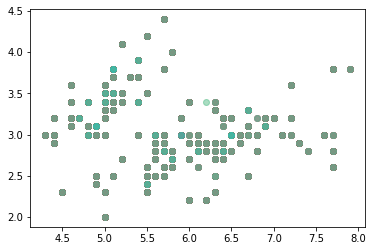

In [23]:
import matplotlib.pyplot as plt

classes = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

for c in classes:
  X0 = []
  X1 = []
  for d in data:
    if d[1] == c:
      X0.append(d[0][0])
      X1.append(d[0][1])

    plt.scatter(X0, X1, alpha = 0.3)

plt.show()

In [37]:
import random

random.shuffle(data)
train = data[:-30]
test = data[-30:]

[([5.0, 3.2, 1.2, 0.2], 'Iris-setosa'), ([6.4, 2.8, 5.6, 2.2], 'Iris-virginica'), ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'), ([4.6, 3.1, 1.5, 0.2], 'Iris-setosa'), ([6.4, 2.8, 5.6, 2.1], 'Iris-virginica'), ([6.9, 3.1, 5.1, 2.3], 'Iris-virginica'), ([5.2, 3.4, 1.4, 0.2], 'Iris-setosa'), ([6.3, 2.5, 5.0, 1.9], 'Iris-virginica'), ([6.7, 3.1, 4.7, 1.5], 'Iris-versicolor'), ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'), ([7.2, 3.2, 6.0, 1.8], 'Iris-virginica'), ([5.5, 2.6, 4.4, 1.2], 'Iris-versicolor'), ([5.6, 3.0, 4.1, 1.3], 'Iris-versicolor'), ([7.7, 2.8, 6.7, 2.0], 'Iris-virginica'), ([4.8, 3.4, 1.6, 0.2], 'Iris-setosa'), ([6.7, 2.5, 5.8, 1.8], 'Iris-virginica'), ([5.5, 2.5, 4.0, 1.3], 'Iris-versicolor'), ([7.1, 3.0, 5.9, 2.1], 'Iris-virginica'), ([5.4, 3.9, 1.7, 0.4], 'Iris-setosa'), ([5.8, 2.8, 5.1, 2.4], 'Iris-virginica'), ([6.4, 2.7, 5.3, 1.9], 'Iris-virginica'), ([6.1, 2.9, 4.7, 1.4], 'Iris-versicolor'), ([5.2, 3.5, 1.5, 0.2], 'Iris-setosa'), ([7.7, 2.6, 6.9, 2.3], 'Iris-virginica'), ([6.5, 2.8

In [69]:
#Euclidian distance
def distance(a,b):

  s=0
  for ai, bi in zip(a,b):
    s += (bi - ai) ** 2
  return s ** 0.5

In [80]:
from collections import Counter

def knn(query, k, train):

  # train 에서 query랑 가까운 k개 찾기
  dist_class = []
  for v, c in train:
    d = distance(query, v)
    dist_class.append(  (d,c) )

  dist_class.sort()
  dist_class = dist_class[:k]

  # 가중치를 준다면?
  cls_cnt = {}
  for d, c in dist_class:
    if c not in cls_cnt:
      cls_cnt[c] = 0
    cls_cnt[c] += 1

  return max(cls_cnt.items(), key=lambda cc: cc[1])[0]

  #가장 많이 나온 class를 return
  # class_cnt = Counter([c for d, c in dist_class])

  # return class_cnt.most_common(1)[0][0]


    

100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


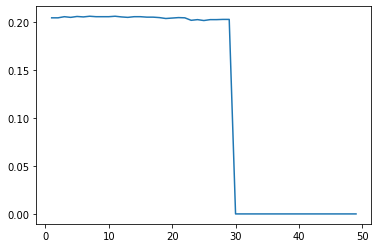

In [86]:
from tqdm import tqdm


acc_avg = [0] * 50

n_trials = 30

for _ in tqdm(range(n_trials)):
  random.shuffle(data)
  train = data[:-30]
  test = data[-30:]

  for k in range(1, 30):
    correct_cnt = 0
    for t_vec, t_cls in test:
      expected = knn(t_vec, k, train)
      if expected == t_cls:
        correct_cnt += 1/(1+d)
    accuracy = correct_cnt / len(test)
    acc_avg[k] += accuracy

acc_avg = [a / n_trials for a in acc_avg]

acc_avg = acc_avg[1:]
X = range(1,50)


plt.plot(X, acc_avg)
plt.show()